### Regularized Linear Regression
- 다이아몬드의 특성을 회귀분석하여, 예상 가격을 예측한다.

In [1]:
import pandas as pd

# 데이터 세트 호출
d_df = pd.read_csv('./datasets/diamond.csv')
d_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


#### 📊 데이터 탐색

In [2]:
# 데이터 정보 확인
d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


#### 📊 전처리

In [3]:
# 필요한 컬럼만 추출
pre_d_df = d_df.loc[:, ['carat', 'depth', 'price']]
pre_d_df

,carat,depth,price
0,0.23,61.5,326
1,0.21,59.8,326
2,0.23,56.9,327
3,0.29,62.4,334
4,0.31,63.3,335
...,...,...,...
53938,0.86,61.0,2757
53939,0.75,62.2,2757
53940,0.71,60.5,2756
53941,0.71,59.8,2756


In [4]:
# 결측치 확인
pre_d_df.isna().sum()

carat    0
depth    0
price    0
dtype: int64

In [5]:
# 데이터 중복행 확인
pre_d_df.duplicated().sum()

5129

In [6]:
# 데이터 중복행 제거 
pre_d_df.drop_duplicates(inplace=True)

In [7]:
# 데이터 중복행 제거 확인
pre_d_df.duplicated().sum()

0

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

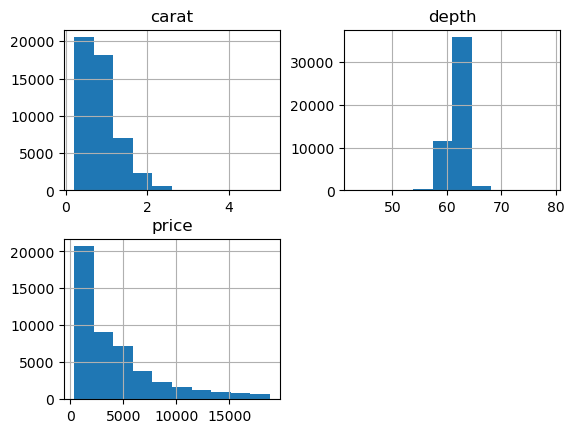

In [8]:
# 데이터 분포 확인
pre_d_df.hist()

In [9]:
import numpy as np

# 타겟 컬럼의 로그변환
pre_d_df.loc[:, 'price'] = np.log1p(pre_d_df.price)
pre_d_df

,carat,depth,price
0,0.23,61.5,5.789960
1,0.21,59.8,5.789960
2,0.23,56.9,5.793014
3,0.29,62.4,5.814131
4,0.31,63.3,5.817111
...,...,...,...
53935,0.72,60.8,7.922261
53936,0.72,63.1,7.922261
53937,0.70,62.8,7.922261
53938,0.86,61.0,7.922261


#### 📊 훈련

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
# 타겟, 피처 데이터 분리
features, targets = pre_d_df.iloc[:, :-1], pre_d_df.iloc[:, -1]

# 학습/테스트, 문제/정답 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델 객체 생성
l_r = LinearRegression()
# 학습
l_r.fit(X_train, y_train)

LinearRegression()

#### 📊 평가

In [11]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [12]:
# 예측
prediction = l_r.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

MSE: 0.1620, RMSE: 0.4024, MSLE: 0.0020, RMSLE: 0.0447, R2: 0.8381


#### 📊 다항회귀

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# 데이터 세트 분리
# 타겟, 피처 데이터 분리
features, targets = pre_d_df.iloc[:, :-1], pre_d_df.iloc[:, -1]

# 3차 다항식 변환
poly_features = PolynomialFeatures(degree=3).fit_transform(features)

# 학습/테스트, 문제/정답 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델 객체 생성
l_r = LinearRegression()
# 훈련
l_r.fit(X_train, y_train)

LinearRegression()

In [14]:
# 예측
prediction = l_r.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

MSE: 0.0673, RMSE: 0.2595, MSLE: 0.0009, RMSLE: 0.0294, R2: 0.9327


#### 📊 Lasso

In [15]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# 데이터 세트 분리
# 타겟, 피처 데이터 분리
features, targets = pre_d_df.iloc[:, :-1], pre_d_df.iloc[:, -1]

# 3차 다항식 변환
poly_features = PolynomialFeatures(degree=3).fit_transform(features)

# 학습/테스트, 문제/정답 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

# Lasso 선형 회귀 모델, L1 규제 사용
lasso = Lasso(alpha=100, max_iter=10000)
# 학습
lasso.fit(X_train, y_train)

Lasso(alpha=100, max_iter=10000)

In [16]:
# 예측
prediction = lasso.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

MSE: 0.1684, RMSE: 0.4103, MSLE: 0.0022, RMSLE: 0.0466, R2: 0.8316


#### 📊 Ridge

In [17]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# 데이터 세트 분리
# 타겟, 피처 데이터 분리
features, targets = pre_d_df.iloc[:, :-1], pre_d_df.iloc[:, -1]

# 3차 다항식 변환
poly_features = PolynomialFeatures(degree=3).fit_transform(features)

# 학습/테스트, 문제/정답 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

# Ridge 선형 회귀 모델, L2 규제 사용
ridge = Ridge(alpha=1e+10, max_iter=10000)
# 학습
ridge.fit(X_train, y_train)

Ridge(alpha=10000000000.0, max_iter=10000)

In [18]:
# 예측
prediction = ridge.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

MSE: 0.1697, RMSE: 0.4120, MSLE: 0.0022, RMSLE: 0.0469, R2: 0.8303
